In [1]:
%matplotlib inline
# matplotlib.rcParams['backend'] = 'Qt6Agg'
# It is better to view the results in separate windows so that you
# can zoom in more comfortably. If an error pops up that no qt bindings
# can be found, install the package pyqt5 by the command
#   pip install pyqt5
# If everything fails change to %matplotlib (without qt) or %matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# a function which will be helpful:

def plot_spectrum(spc, wintitle):
    plt.figure(wintitle)
    plt.clf()
    center_x, center_y = np.round(spc.shape[1]/2), np.round(spc.shape[0]/2)
    plt.plot([0, spc.shape[1]], [center_y, center_y], 'r--', linewidth=0.5)
    plt.plot([center_x, center_x], [0, spc.shape[0]], 'r--', linewidth=0.5)
    plt.imshow(spc)
    plt.show()

---
#### P2Prep: Fourier transforms and directional derivatives

---
<div class="alert alert-info">
<p>
University of Applied Sciences Munich<br>
Dept of Electrical Enineering and Information Technology<br>
Institute for Applications of Machine Learning and Intelligent Systems (IAMLIS)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(c) Alfred Schöttl 2023<br>
</p>
</div>

In this notebook, we will check that your installation is capable of calculating and displaying a Fourier transform. We will furthermore get to know the basic Fourier operations. In the second part we repeat the notion of a directional derivative which will also be needed in the next session.

## 1. Create a simple test image:

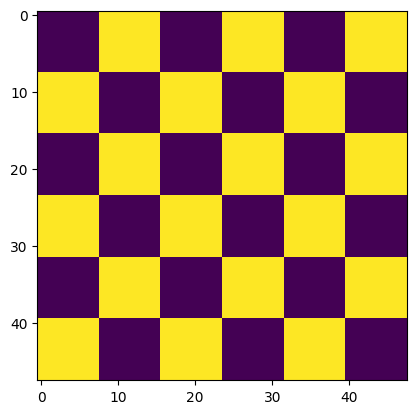

In [2]:
img = (((np.indices((48,48))//8).sum(axis=0)) % 2).astype(float)  # you do not need to understand this
plt.imshow(img)

## 2. Try out the following Fourier functions of OpenCV and numpy:
- Use the function `cv2.dft(..., flags=cv2.DFT_COMPLEX_output)` to compute the (complex) spectrum of `img`. The real and imaginary part are stored as two channels of a `float` image.
- Use the function `np.fft.fftshift` to shift the origin of the fft in the center of the spectrum image.
- Use the function `mag, phase = cv2.cartToPolar(`_real spectral part_, _imaginary spectral part_ `)` to convert the Re/Im representation of the spectrum to an Euler (magnitude/phase) representation.
- Use the already prepared function `plot_spectrum` to display the logarithm of the magnitude.

/tmp/ipykernel_4492/965057918.py:4: RuntimeWarning: divide by zero encountered in log
  logmag = np.log(mag)


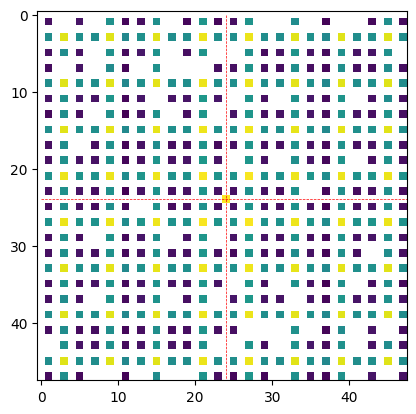

In [3]:
ft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(ft)
mag, phase = cv2.cartToPolar(dft_shifted[:,:,0], dft_shifted[:,:,1])
logmag = np.log(mag)
plot_spectrum(logmag, 'Spectrum')                                     # you may prefer plot_spectrum(mag, 'Spectrum')

## 3. Understand directional derivatives
Assume a function $f:R^2\to R$, something like $f(x,y)=(y+1)^2+5\cos(x)$.

In [4]:
def f(x,y):
    return (y+1)**2 + 5*np.cos(x)

In [5]:
def df(x,y):
    dx = -5*np.sin(x)
    dy = 2*(y+1)
    return dx, dy

Let's display its graph.

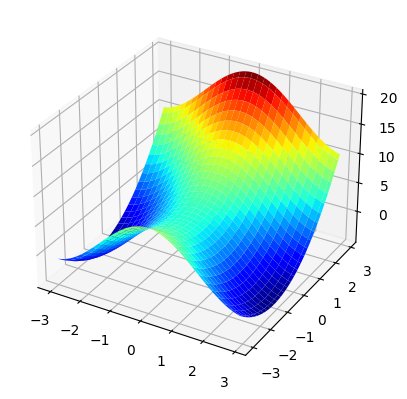

In [6]:
x = y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')

Calculate the approximate gradient $\frac{\partial f}{\partial (x,y)}$ of $f$ at $(1,0)$ by hand (and calculator) and write down the result as numpy array `grad` in the next cell. Interpret the values with the help of the displayed graph. 

_Hint_: This gradient is a vector with two elements.

In [7]:
grad = np.array(df(1, 0))

The first element of the gradient is $\partial f/\partial x$, which is the derivative of $f$ in the direction $(1,0)$. The second element of the gradient is $\partial f/\partial y$, which is the derivative of $f$ in the direction $(0,1)$. 

What is the derivative of $f$ in the direction $r=(0.707, 0.707)$? Let's call it `df_dr`. Add the missing line in the next cell.

_Remark_: Directions are typically normalized to length 1. So, $(0.707, 0.707)=(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}})$ is just the "diagonal" direction $(1,1)$ normalized by its length $\| (1,1)\|$.

In [8]:
r = np.array([1,1])
r = r / np.linalg.norm(r)
df_dr = np.dot(grad, r)
print(df_dr)

-1.5608356352738344


Also try out other directions.